In [1]:
from ml_utils import *

In [2]:
import numpy as np

def gera_dados(N = 100):

    np.random.seed(42)

    X = np.random.uniform(-1.5, 1.5, N)

    b0, b1, b2, b3, b4 = 0, -0.2, 0.2, 0.2, 0.6

    y = b0 + b1*X + b2*(X**2) + b3*(X**3) + b4*(X**4) + np.random.normal(0, 0.25, N)

    X = X.reshape(-1, 1)

    return X, y

In [3]:
X, y = gera_dados(N=100)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

reglin = LinearRegression().fit(X_train, y_train)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, include_bias=False).fit(X_train)

X_train_transf = pf.transform(X_train)
X_test_transf = pf.transform(X_test)

In [7]:
from sklearn.pipeline import Pipeline

In [8]:
reglin_pipe

Pipeline(steps=[('pf', PolynomialFeatures(degree=3, include_bias=False)),
                ('reglin', LinearRegression())])

In [9]:
reglin_pipe.predict(X_test)

array([ 1.93969213,  1.71298779,  0.57251159, -0.04071275,  0.47235501,
       -0.24152216,  0.28941393,  1.36935109,  2.34223977, -0.06525579,
       -0.22489601, -0.21393968,  0.9175683 ,  2.37994498,  1.45470763,
        1.1655773 ,  0.5654253 ,  1.84539201,  1.06988206,  1.05649177,
        2.03368508,  1.62733017,  0.84813161,  2.21017855,  2.91199366,
        0.96261236,  1.43464351, -0.31791437,  0.16937686,  2.48921011,
        2.66774284, -0.31810872,  0.13014895, -0.2467007 , -0.29447129,
        1.16576162,  1.28279404, -0.3106255 ,  0.85701202,  0.22852149,
        0.95222265,  2.60787452,  1.40111998, -0.31036191, -0.31789985,
        0.29414151, -0.17306897,  0.6694259 ,  1.03583218,  0.76224111])

In [10]:
reglin_pipe["reglin"]

LinearRegression()

In [12]:
reglin_pipe["pf"]

PolynomialFeatures(degree=3, include_bias=False)

In [13]:
reglin_pipe["reglin"].coef_

array([-0.15676117,  1.39540818,  0.1532509 ])

In [14]:
def plot_reglin_poly_feature(modelo, X_train, y_train, X_test, y_test):

    title = "Modelo de Regressão Linear"


    if isinstance(modelo, Pipeline):
        modelo = modelo[-1]

    n_features = len(modelo.coef_)
      

    if n_features > 1:
        title += f" - com features polinomiais de grau {n_features}"

    plt.title(title)

    plt.scatter(X_train, y_train, label="treino")
    plt.scatter(X_test, y_test, label="teste")

    x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 10000)

    y_plot_modelo = modelo.intercept_ 

    for i in range(n_features):
        y_plot_modelo += modelo.coef_[i]*(x_plot_modelo**(i+1))


    plt.plot(x_plot_modelo, y_plot_modelo, color="red", label="modelo")

    plt.legend()
    plt.show()


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.21
RMSE: 0.26
MAPE: 107.75%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.90
MAE: 0.27
RMSE: 0.33
MAPE: 136.02%


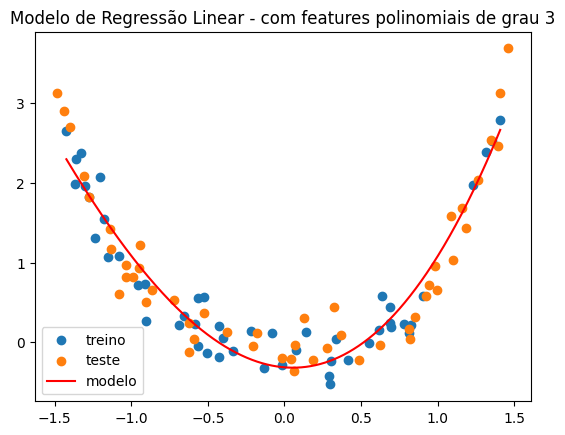

In [15]:
reglin_pipe = Pipeline([
    ("pf", PolynomialFeatures(degree=3, include_bias=False)),
    ("reglin", LinearRegression())
]).fit(X_train, y_train)

_ = reg_metrics_train_test(reglin_pipe, X_train, y_train, X_test, y_test)
plot_reglin_poly_feature(reglin_pipe, X_train, y_train, X_test, y_test)


                   Modelo com features polinomiais de grau 1                    


Metricas de avaliação (dados de treino):

R^2: 0.04
MAE: 0.73
RMSE: 0.92
MAPE: 400.70%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: -0.13
MAE: 0.81
RMSE: 1.09
MAPE: 305.02%


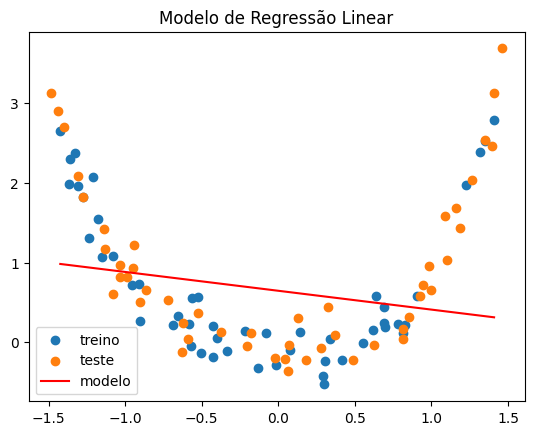


                   Modelo com features polinomiais de grau 2                    


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.22
RMSE: 0.27
MAPE: 130.54%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.89
MAE: 0.27
RMSE: 0.34
MAPE: 139.58%


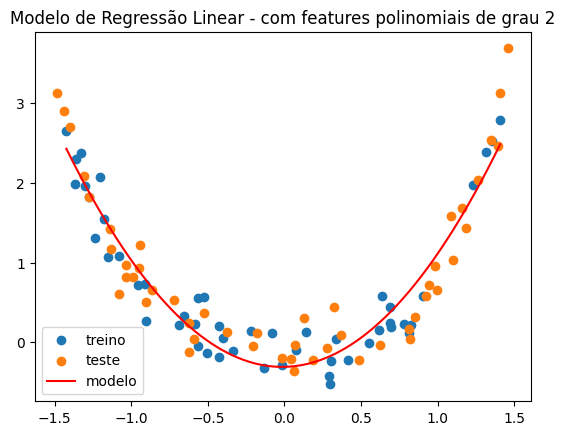


                   Modelo com features polinomiais de grau 3                    


Metricas de avaliação (dados de treino):

R^2: 0.92
MAE: 0.21
RMSE: 0.26
MAPE: 107.75%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.90
MAE: 0.27
RMSE: 0.33
MAPE: 136.02%


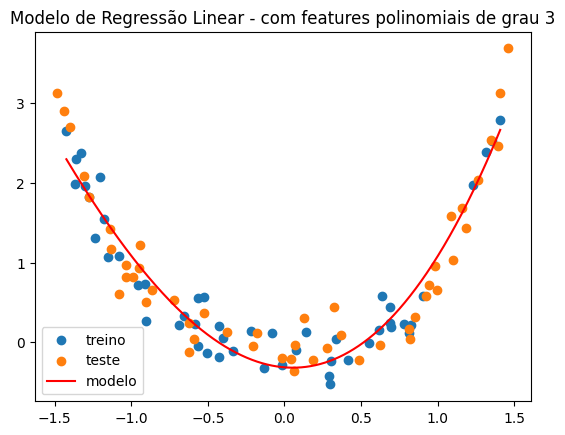


                   Modelo com features polinomiais de grau 4                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.22
MAPE: 75.63%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.95
MAE: 0.18
RMSE: 0.22
MAPE: 82.12%


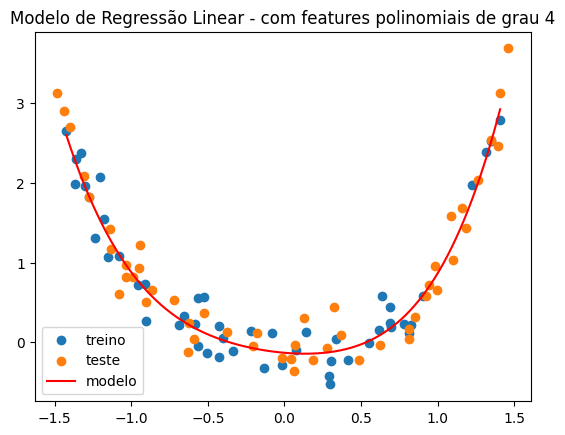


                   Modelo com features polinomiais de grau 5                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.22
MAPE: 73.37%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.95
MAE: 0.18
RMSE: 0.23
MAPE: 85.65%


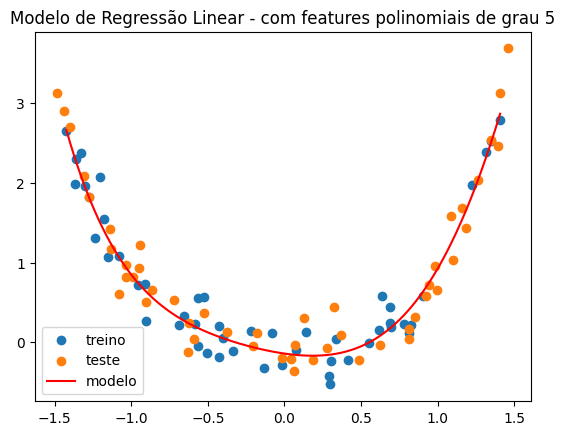


                   Modelo com features polinomiais de grau 6                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.22
MAPE: 72.62%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.95
MAE: 0.18
RMSE: 0.23
MAPE: 83.72%


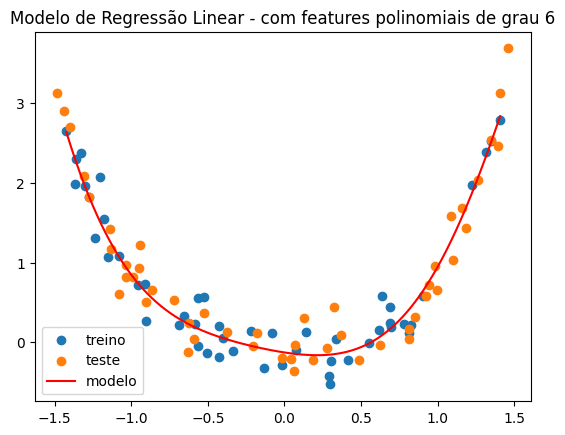


                   Modelo com features polinomiais de grau 7                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.22
MAPE: 74.11%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.95
MAE: 0.19
RMSE: 0.23
MAPE: 85.36%


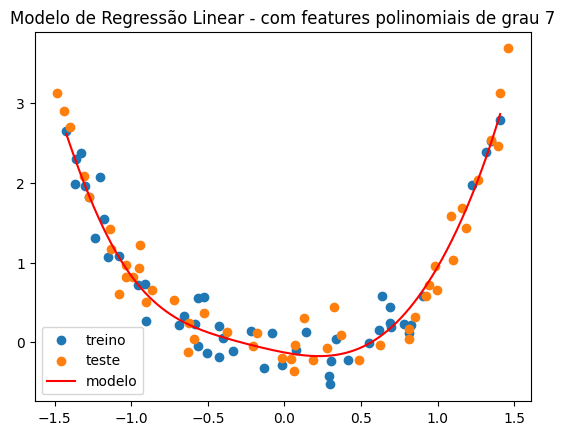


                   Modelo com features polinomiais de grau 8                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.21
MAPE: 83.68%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.94
MAE: 0.20
RMSE: 0.26
MAPE: 87.95%


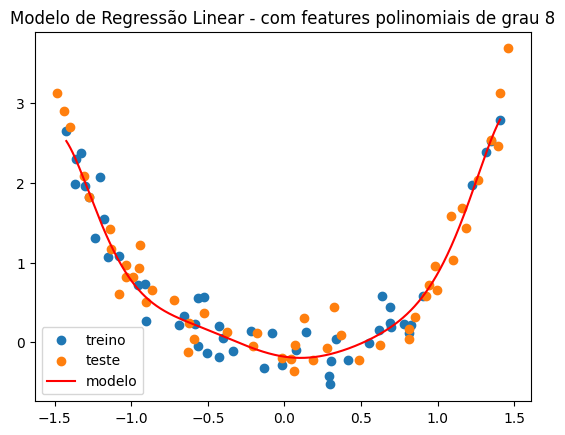


                   Modelo com features polinomiais de grau 9                    


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.21
MAPE: 93.31%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.92
MAE: 0.20
RMSE: 0.28
MAPE: 88.61%


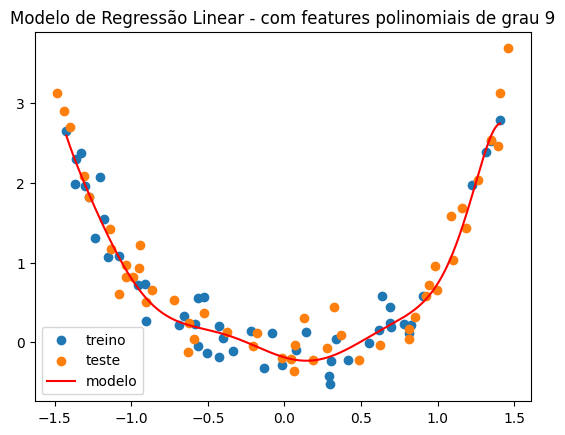


                   Modelo com features polinomiais de grau 10                   


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.21
MAPE: 92.92%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.92
MAE: 0.20
RMSE: 0.29
MAPE: 88.80%


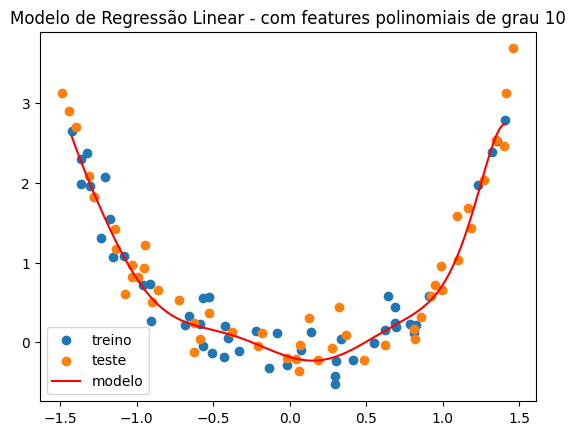


                   Modelo com features polinomiais de grau 11                   


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.17
RMSE: 0.21
MAPE: 94.72%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.93
MAE: 0.20
RMSE: 0.28
MAPE: 89.14%


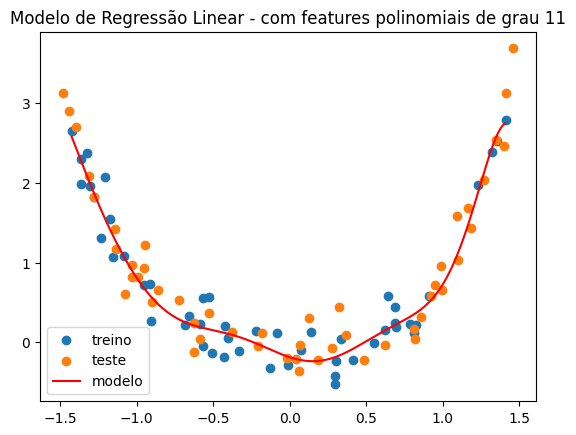


                   Modelo com features polinomiais de grau 12                   


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.16
RMSE: 0.20
MAPE: 98.22%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.92
MAE: 0.21
RMSE: 0.28
MAPE: 94.56%


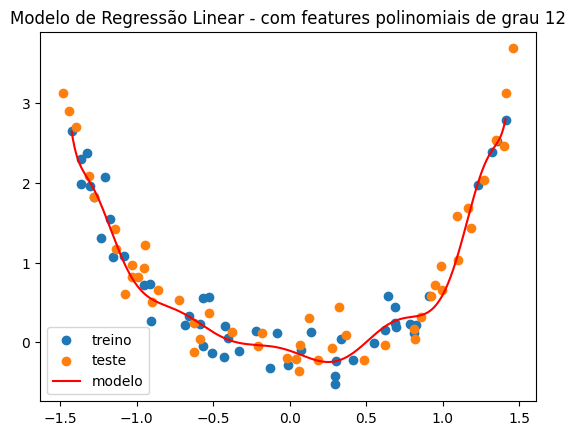


                   Modelo com features polinomiais de grau 13                   


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.16
RMSE: 0.20
MAPE: 94.28%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.93
MAE: 0.22
RMSE: 0.27
MAPE: 94.18%


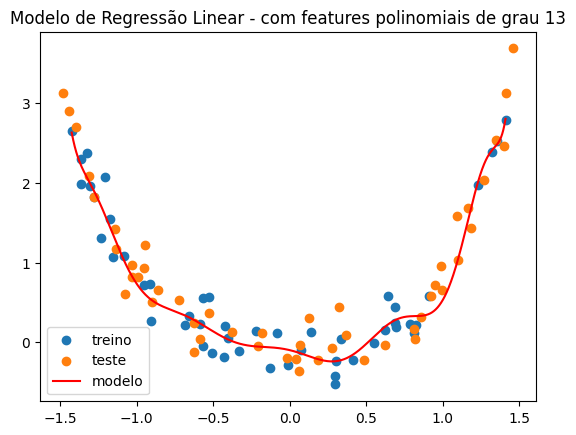


                   Modelo com features polinomiais de grau 14                   


Metricas de avaliação (dados de treino):

R^2: 0.95
MAE: 0.16
RMSE: 0.20
MAPE: 105.40%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.93
MAE: 0.22
RMSE: 0.28
MAPE: 95.91%


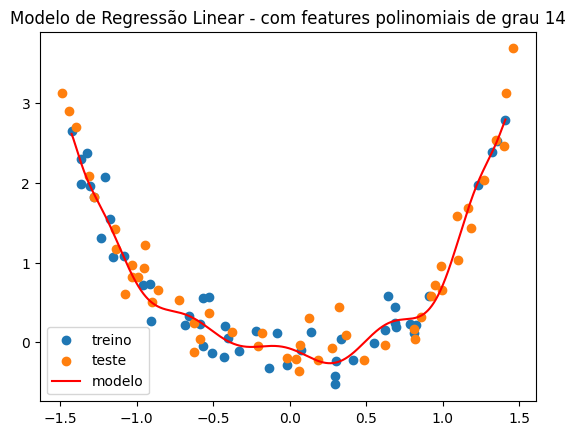


                   Modelo com features polinomiais de grau 15                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.16
RMSE: 0.20
MAPE: 109.55%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.45
MAE: 0.34
RMSE: 0.76
MAPE: 99.21%


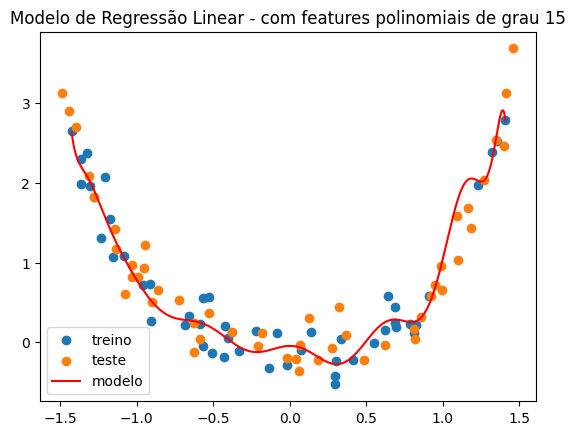


                   Modelo com features polinomiais de grau 16                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.16
RMSE: 0.20
MAPE: 115.04%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.60
MAE: 0.32
RMSE: 0.65
MAPE: 99.94%


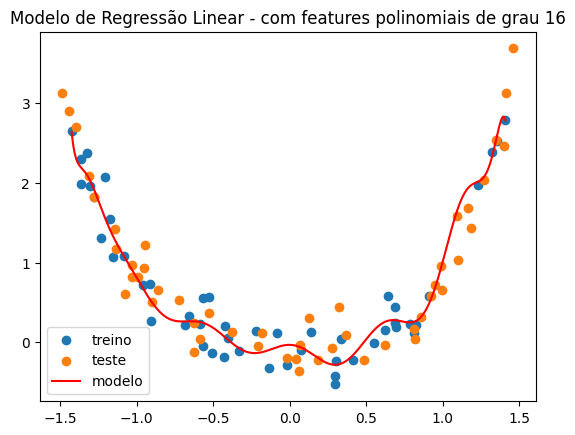


                   Modelo com features polinomiais de grau 17                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.16
RMSE: 0.20
MAPE: 116.87%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: 0.79
MAE: 0.27
RMSE: 0.46
MAPE: 98.10%


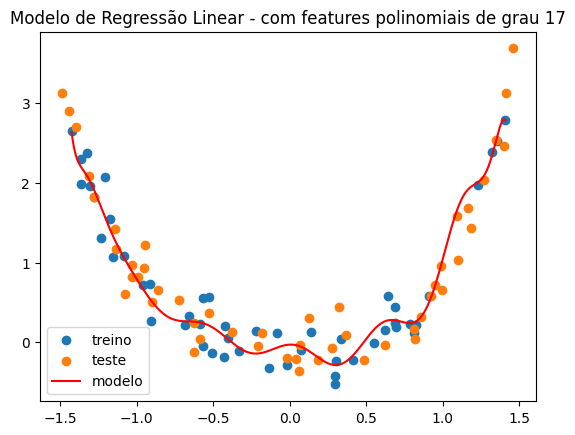


                   Modelo com features polinomiais de grau 18                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.15
RMSE: 0.19
MAPE: 106.52%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: -1.55
MAE: 0.55
RMSE: 1.64
MAPE: 105.64%


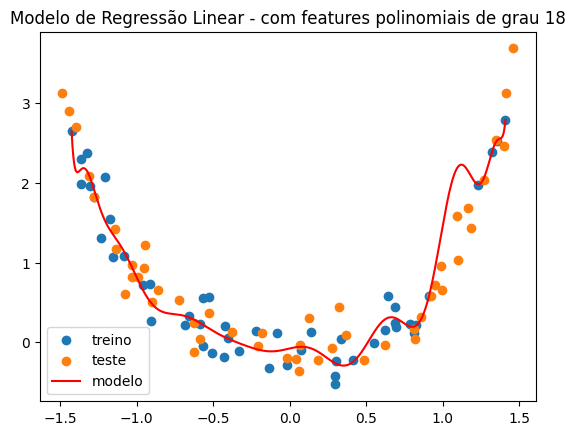


                   Modelo com features polinomiais de grau 19                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.15
RMSE: 0.19
MAPE: 97.25%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: -1.74
MAE: 0.59
RMSE: 1.70
MAPE: 107.93%


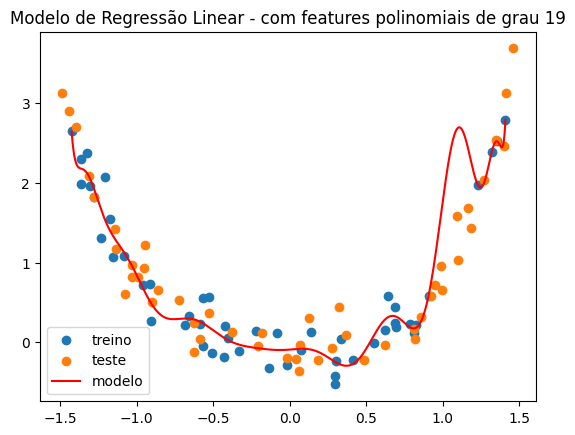


                   Modelo com features polinomiais de grau 20                   


Metricas de avaliação (dados de treino):

R^2: 0.96
MAE: 0.15
RMSE: 0.19
MAPE: 93.52%
------------------------------------

Metricas de avaliação (dados de teste):

R^2: -6.23
MAE: 0.84
RMSE: 2.76
MAPE: 116.81%


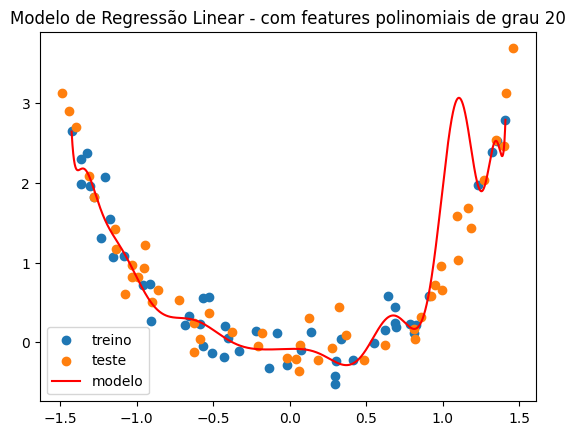

In [26]:
results = {
    "grau" : [],
    "MAE_train": [],
    "MAE_test": []
}

for grau in range(1, 21):

    print(f"\n{'='*80}\n{f'Modelo com features polinomiais de grau {grau}'.center(80)}\n{'='*80}\n")

    reglin_pipe = Pipeline([
        ("pf", PolynomialFeatures(degree=grau, include_bias=False)),
        ("reglin", LinearRegression())
    ]).fit(X_train, y_train)

    metrics_train, metrics_test = reg_metrics_train_test(reglin_pipe, X_train, y_train, X_test, y_test)
    plot_reglin_poly_feature(reglin_pipe, X_train, y_train, X_test, y_test)

    results["grau"].append(grau)
    results["MAE_train"].append(metrics_train["MAE"])
    results["MAE_test"].append(metrics_test["MAE"])

In [27]:
df_results = pd.DataFrame(results)

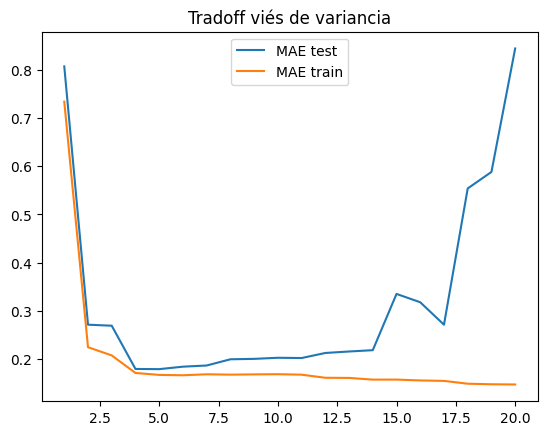

In [28]:
plt.title("Tradoff viés de variancia")

plt.plot(df_results["grau"], df_results["MAE_test"], label="MAE test")
plt.plot(df_results["grau"], df_results["MAE_train"], label="MAE train")

plt.legend()
plt.show()